# Convolution Operator


**Convolution: ** In mathematics (and, in particular, functional analysis) convolution is a mathematical operator on two functions (f and g) to produce a third function that expresses how the shape of one is modified by the other. 

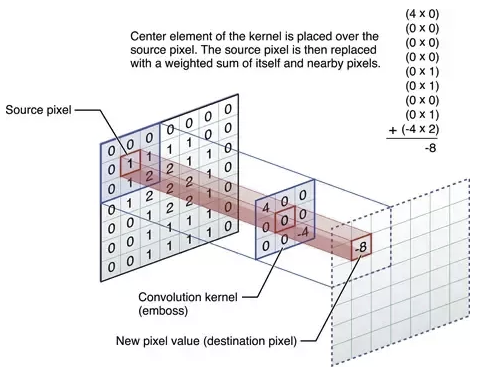

**The convolution filter has an input user (i.e., filter size). The filter content is learnt from network. **

# Pading, stride, pooling cocepts and calculations 

## Example

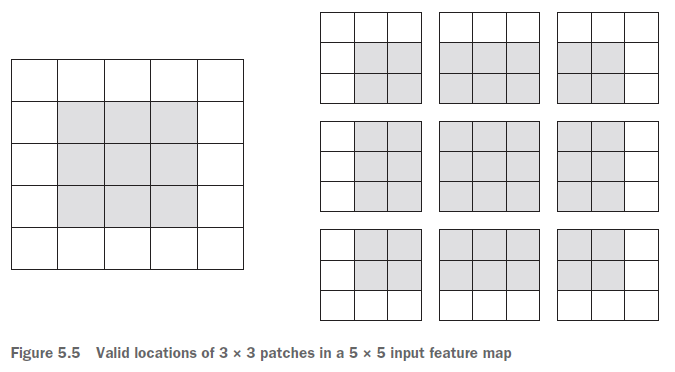



# Pading

**It is the process that consists of adding an approperiate number of rows and columns of each side of the input feature map so as to make it possible to fit center convolution windows around every input tile** 

## Example

**Given that the input is 5x5 matrix, we need to extract 25 3x3 patches**

 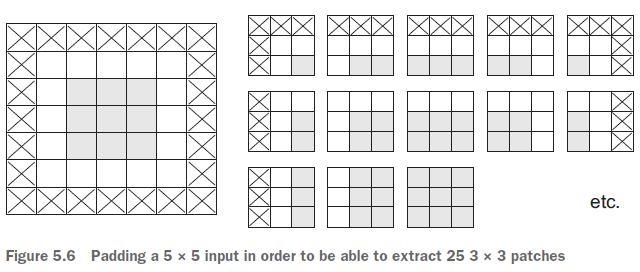




# Stride

**It is a parameter of the convolution equals the distance between two successive windows; the default stride = 1**   

## Example

**Given that the input is 5x5 matrix, we have a 3x3 convolution with stride=2**

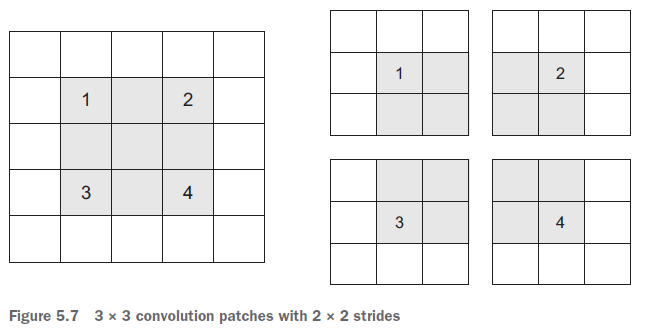




## Pooling

**Pooling** is a form of non-linear down-sampling. There are several non-linear functions to implement pooling among which max pooling is the most common. 

**Max-pool**: It partitions the input image into a set of non-overlapping rectangles and, for each such sub-region, outputs the maximum. 

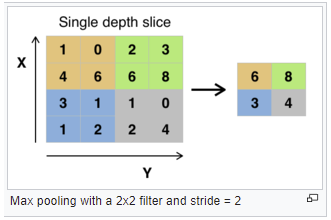



# Stride and pading cocepts and calculations 


[article](https://arxiv.org/pdf/1603.07285.pdf)

[Its github](https://github.com/vdumoulin/conv_arithmetic)



# The whole calculation illustrations and visualization 

[Visual example](http://cs231n.github.io/convolutional-networks/#conv)

http://machinelearninguru.com/computer_vision/basics/convolution/convolution_layer.html

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import keras
from keras import backend as K

cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
cfg.gpu_options.per_process_gpu_memory_fraction=0.333
K.set_session(K.tf.Session(config=cfg))

/opt/conda/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Fashion-MNIST database of fashion articles

Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST. The class labels are:

Label	          Description       
0	T-shirt/top      
1	Trouser     
2	Pullover    
3	Dress     
4	Coat    
5	Sandal  
6	Shirt   
7	Sneaker    
8	Bag     
9	Ankle boot  


In [2]:
#Load the data


from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

In [3]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline


print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [4]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [5]:
# Filters 32 and 64 and relu.. 3 layers 

 

from keras import layers
from keras import models

fashion_model = models.Sequential()
fashion_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
fashion_model.add(layers.MaxPooling2D((2, 2)))
fashion_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
fashion_model.add(layers.MaxPooling2D((2, 2)))
fashion_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
fashion_model.add(layers.Flatten())
fashion_model.add(layers.Dense(64, activation='relu'))        
fashion_model.add(layers.Dense(10, activation='softmax'))

In [6]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [7]:
#What is -1 refers in the reshape

train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [8]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [9]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [10]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [11]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [12]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [13]:
fashion_model_train = fashion_model.fit(train_X, train_label, batch_size=64,epochs=20,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 23s 475us/step - loss: 0.5960 - acc: 0.7796 - val_loss: 0.4166 - val_acc: 0.8517
Epoch 2/20
48000/48000 [==============================] - 22s 453us/step - loss: 0.3729 - acc: 0.8650 - val_loss: 0.3468 - val_acc: 0.8778
Epoch 3/20
48000/48000 [==============================] - 21s 444us/step - loss: 0.3193 - acc: 0.8839 - val_loss: 0.3251 - val_acc: 0.8800
Epoch 4/20
48000/48000 [==============================] - 21s 442us/step - loss: 0.2857 - acc: 0.8954 - val_loss: 0.3055 - val_acc: 0.8900
Epoch 5/20
48000/48000 [==============================] - 21s 448us/step - loss: 0.2609 - acc: 0.9042 - val_loss: 0.2890 - val_acc: 0.8962
Epoch 6/20
48000/48000 [==============================] - 22s 448us/step - loss: 0.2422 - acc: 0.9121 - val_loss: 0.2842 - val_acc: 0.8962
Epoch 7/20
48000/48000 [==============================] - 21s 443us/step - loss: 0.2227 - acc: 0.9187 - val_loss: 0.

In [14]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.3762792561262846
Test accuracy: 0.9039


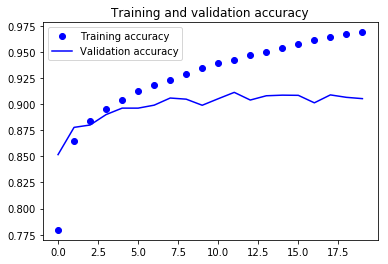

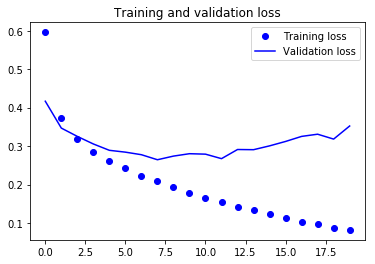

In [15]:
import matplotlib.pyplot as plt
accuracy = fashion_model_train.history['acc']
val_accuracy = fashion_model_train.history['val_acc']
loss = fashion_model_train.history['loss']
val_loss = fashion_model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


# Dropout Regularization

Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.[relative link](http://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)

## Training Phase:
Training Phase: For each hidden layer, for each training sample, for each iteration, ignore (zero out) a random fraction, p, of nodes (and corresponding activations).

## Testing Phase:
Use all activations, but reduce them by a factor p (to account for the missing activations during training).

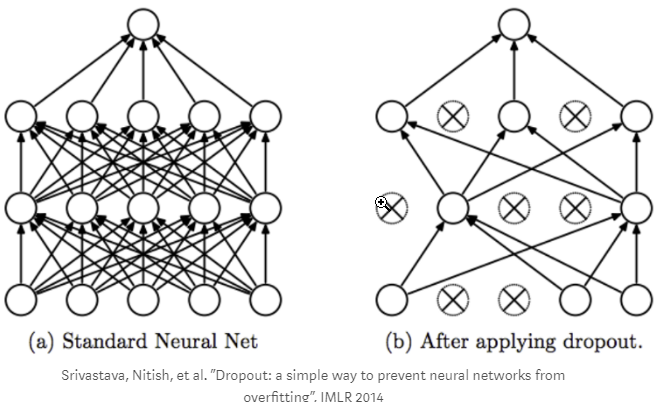

[relative link](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5)

In [17]:
import keras
import tensorflow as tf

# Define your own leak Relu
"""Batch Normalization is to increase the stability of a neural network, 
   batch normalization normalizes the output of a previous activation layer by,
   subtracting the batch mean and dividing by the batch standard deviation.
   Link: https://towardsdatascience.com/batch-normalization-in-neural-networks-1ac91516821c
"""

from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

def lrelu(x,alpha):
  return tf.nn.relu(x) - alpha * tf.nn.relu(-x)

In [18]:
batch_size = 64
epochs = 20
num_classes = 10
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(keras.layers.Lambda(lrelu,arguments={'alpha':0.1}))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(keras.layers.Lambda(lrelu,arguments={'alpha':0.1}))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(keras.layers.Lambda(lrelu,arguments={'alpha':0.1}))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(keras.layers.Lambda(lrelu,arguments={'alpha':0.1}))         
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [19]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
lambda_1 (Lambda)            (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
lambda_2 (Lambda)            (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [20]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [21]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 51s 1ms/step - loss: 0.5996 - acc: 0.7773 - val_loss: 0.3744 - val_acc: 0.8599
Epoch 2/20
48000/48000 [==============================] - 50s 1ms/step - loss: 0.3758 - acc: 0.8634 - val_loss: 0.3172 - val_acc: 0.8810
Epoch 3/20
48000/48000 [==============================] - 50s 1ms/step - loss: 0.3264 - acc: 0.8800 - val_loss: 0.2990 - val_acc: 0.8868
Epoch 4/20
48000/48000 [==============================] - 50s 1ms/step - loss: 0.3025 - acc: 0.8872 - val_loss: 0.2654 - val_acc: 0.9003
Epoch 5/20
48000/48000 [==============================] - 50s 1ms/step - loss: 0.2801 - acc: 0.8958 - val_loss: 0.2567 - val_acc: 0.9058
Epoch 6/20
48000/48000 [==============================] - 50s 1ms/step - loss: 0.2685 - acc: 0.9007 - val_loss: 0.2402 - val_acc: 0.9117
Epoch 7/20
48000/48000 [==============================] - 50s 1ms/step - loss: 0.2568 - acc: 0.9036 - val_loss: 0.2481 - val_acc

In [22]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10000/10000 [==============================] - 5s 462us/step
Test loss: 0.22205148881375789
Test accuracy: 0.9213


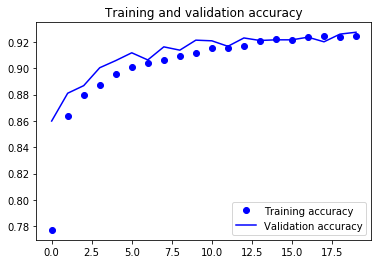

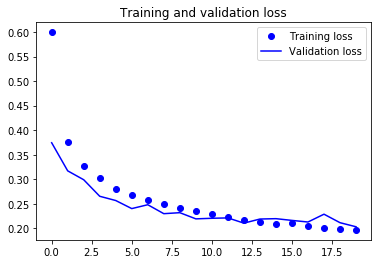

In [23]:
accuracy = fashion_train_dropout.history['acc']
val_accuracy = fashion_train_dropout.history['val_acc']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()